## HappyDB is a corpus of 100,000 crowd-sourced happy moments via Amazon's Mechanical Turk.

## Here, we explore this data set and try to answer the question, "What makes people happy?"

## Next, we will explore whether marital status has an impact on moments of happiness


# Part 1: Data Preprocessing:

### Load Data: Load cleaned_hm.csv and demographic.csv from the GitHub link.
### Data Merge: Merge the two CSV files based on the common ID so that we can group the descriptions of happiness by marital status.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import pandas as pd

In [3]:
import pandas as pd

# Load the datasets
cleaned_hm_url = "https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/cleaned_hm.csv"
demographic_url = "https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/demographic.csv"

cleaned_hm_df = pd.read_csv(cleaned_hm_url)
demographic_df = pd.read_csv(demographic_url)

# Merge the datasets
merged_df = pd.merge(cleaned_hm_df, demographic_df, on='wid', how='inner') # assuming 'wid' is the common column to join on

In [39]:
merged_df.head(10)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,gender,marital,parenthood,processed
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,35,USA,m,single,n,went success date someon felt sympathi connect
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,35,USA,m,single,n,play new game fun enjoy mechan
2,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,35,USA,m,single,n,listen music heard entir album heard
3,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,NaN,bonding,35,USA,m,single,n,went see movi friend
4,34522,2053,24h,"Played guitar, learning a song on it","Played guitar, learning a song on it",True,1,NaN,leisure,35,USA,m,single,n,play guitar learn song
5,35522,2053,24h,Talked to my romantic prospect,Talked to my romantic prospect,True,1,NaN,affection,35,USA,m,single,n,talk romant prospect
6,40281,2053,24h,I played a game for about half an hour.,I played a game for about half an hour.,True,1,leisure,leisure,35,USA,m,single,n,play game half hour
7,40381,2053,24h,I discovered another album I hadn't heard by a...,I discovered another album I hadn't heard by a...,True,1,NaN,achievement,35,USA,m,single,n,discov anoth album heard band recent
8,40481,2053,24h,I talked to the girl I'm dating about some int...,I talked to the girl I'm dating about some int...,True,1,NaN,affection,35,USA,m,single,n,talk girl date interest topic
9,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,29.0,IND,m,married,y,son mark examin


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100535 entries, 0 to 100534
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
 9   age                    100442 non-null  object
 10  country                100332 non-null  object
 11  gender                 100456 non-null  object
 12  marital                100378 non-null  object
 13  parenthood             100457 non-null  object
 14  processed              100535 non-null  object
dtype

In [41]:
merged_df.describe()

,hmid,wid,num_sentence
count,100535.000000,100535.000000,100535.000000
mean,78213.756722,2746.619028,1.340767
std,29178.959001,3535.010347,1.297159
min,27673.000000,1.000000,1.000000
25%,52941.500000,410.000000,1.000000
50%,78204.000000,1125.000000,1.000000
75%,103490.500000,3507.000000,1.000000
max,128766.000000,13839.000000,69.000000


# Part 2: Tokenizing and Stemming
### Load stopwords and stemmer function from NLTK library. Stop words are words like "a", "the", or "in" which don't convey significant meaning. Stemming is the process of breaking a word down into its root.

In [9]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer

# Load the datasets (we assume you have already loaded and merged them)
# If not, you can use the previous code block to do so

# For demonstration purposes, I'll consider the column 'cleaned_hm' for processing
data = merged_df['cleaned_hm'].tolist()

# Load nltk's English stopwords
stopwords = nltk.corpus.stopwords.words('english')
additional_stopwords = ["n't", "'s", "'m", "br", "watch", "happier", "happiest", "last", "week", "past", "happy", "ago", "yesterday", "lot", "today", "months", "month","made"
,"got"]
stopwords.extend(additional_stopwords)

print("We use", len(stopwords), "stop-words from nltk library.")
print(stopwords[:10])

# Initialize the stemmer
stemmer = SnowballStemmer("english")

# Define the tokenization and stemming function
def tokenization_and_stemming(text):
    tokens = [word.lower() for word in nltk.word_tokenize(text) if word.lower() not in stopwords and word.isalpha()]
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Apply the tokenization and stemming function to our data
processed_data = [tokenization_and_stemming(text) for text in data]

# Remove empty documents
processed_data = [doc for doc in processed_data if len(doc) > 0]

# Let's see the processed version of the first document
print(processed_data[0])

# If you want to see the original version of the first document:
print(data[0])



We use 198 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['went', 'success', 'date', 'someon', 'felt', 'sympathi', 'connect']
I went on a successful date with someone I felt sympathy and connection with.
['robot']


# Part 3: Visualization:

In [43]:
pip install wordcloud

In [44]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
# Processed data
merged_df['processed'] = merged_df['cleaned_hm'].apply(lambda x: ' '.join(tokenization_and_stemming(x)))

# Group the processed text by marital status
grouped_text = merged_df.groupby('marital')['processed'].apply(' '.join)

## Bar plot
To illustrate the differences in data volumes for different marital statuses, you can use the matplotlib library in Python to create a bar chart. Suppose your dataframe has a column named 'marital_status' containing the marital status of individuals. Below is a simple example showing how to draw a bar chart.

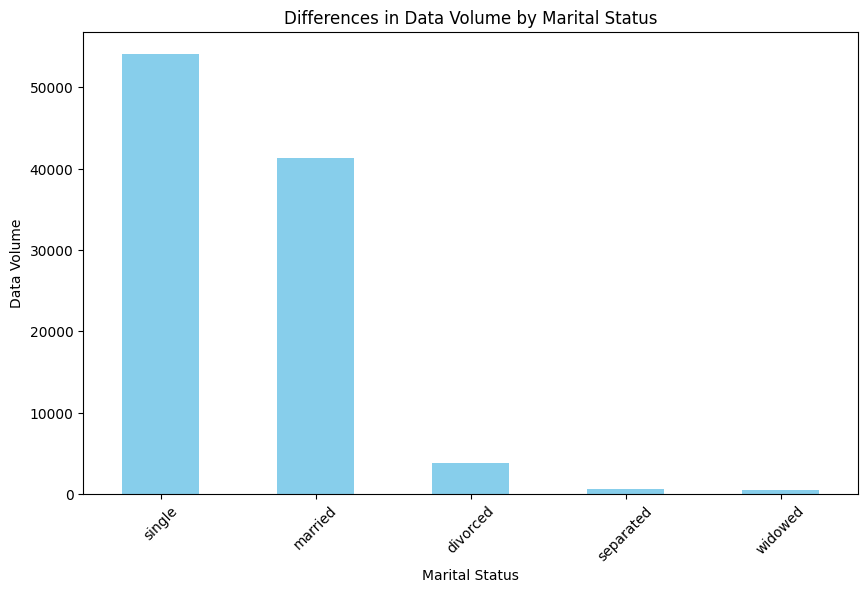

In [47]:
import matplotlib.pyplot as plt

marital_status_counts = merged_df['marital'].value_counts()

plt.figure(figsize=(10,6))
marital_status_counts.plot(kind='bar', color='skyblue')

plt.title('Differences in Data Volume by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Data Volume')
plt.xticks(rotation=45)
plt.show()


We can see that the moments of happiness for married and single individuals are noticeably higher than the other three marital statuses.

There could be several reasons for this observation:

Stability and Support: Married individuals often have the emotional and financial support of their partners, which can contribute to overall happiness.
Freedom and Independence: Single individuals might experience happiness from the freedom and independence they have, without the responsibilities that come with other marital statuses.
Less Complicated Relationships: Both married and single individuals might not face the complexities that come with other marital statuses such as divorce or separation, which can be emotionally taxing.

## Create word clouds for each marital status:
Use the wordcloud library in Python to create word clouds for each marital status, visualizing the most common words under each status.

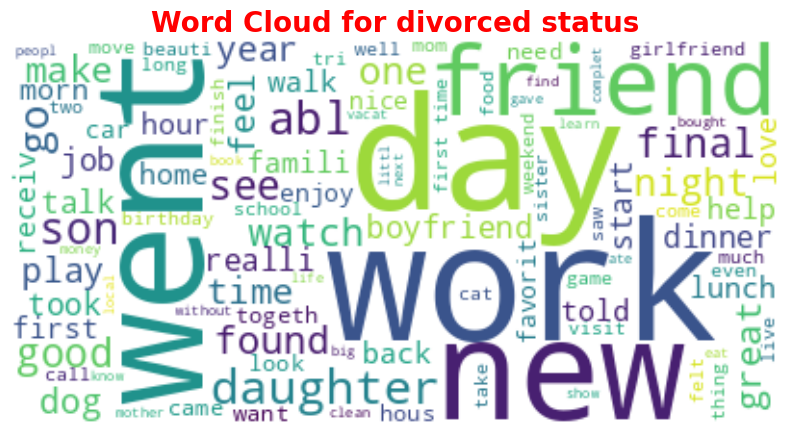

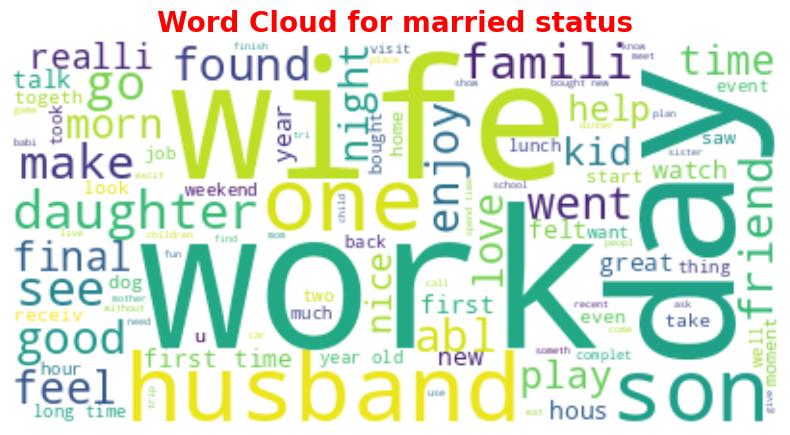

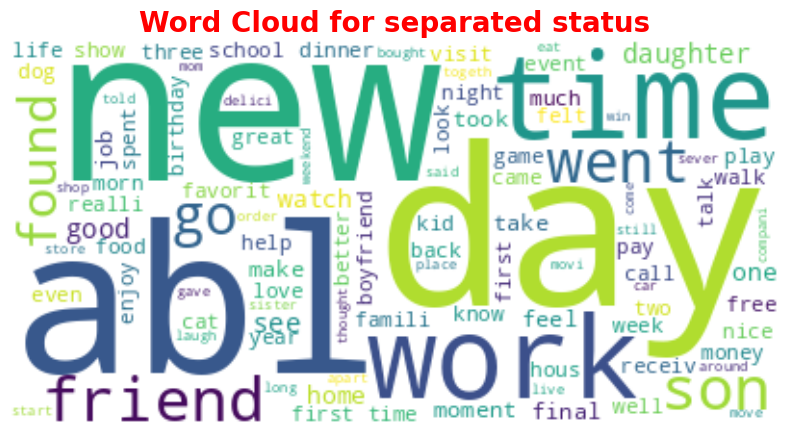

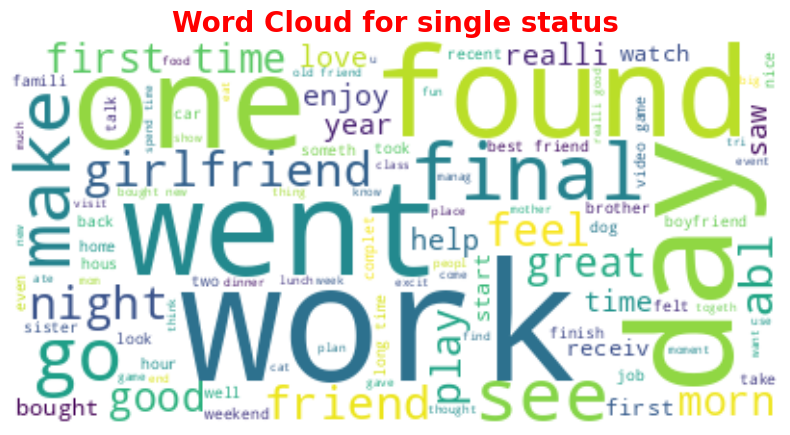

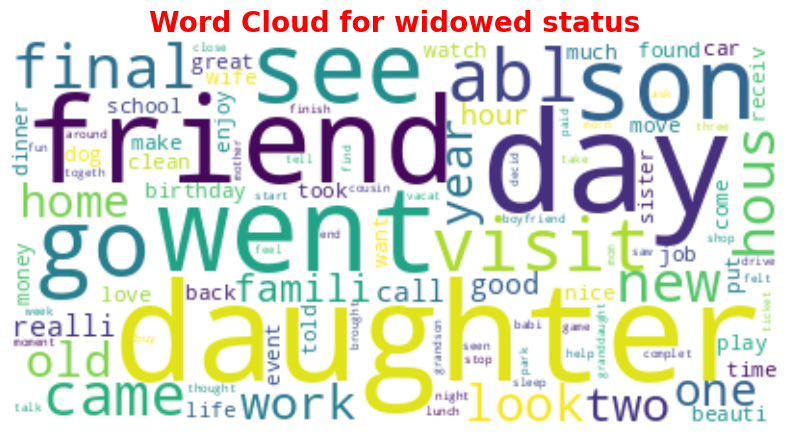

In [48]:
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Processed data
merged_df['processed'] = merged_df['cleaned_hm'].apply(lambda x: ' '.join(tokenization_and_stemming(x)))

# Group the processed text by marital status
grouped_text = merged_df.groupby('marital')['processed'].apply(' '.join)

# Generate word clouds for each marital status
for marital_status, text in grouped_text.items():
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {marital_status} status", fontsize=20, fontweight='bold', color='red')
    plt.axis('off')
    plt.show()


In [49]:
merged_df["processed"]

0            went success date someon felt sympathi connect
1                            play new game fun enjoy mechan
2                      listen music heard entir album heard
3                                      went see movi friend
4                                    play guitar learn song
                                ...                        
100530                              told great employe boss
100531                                              fix car
100532    four year back lost job live save need earn ea...
100533    even receiv call unknown number ask recogn cou...
100534    fond see cricket match semi final champion tro...
Name: processed, Length: 100535, dtype: object

In [50]:
grouped_text

marital
divorced     went grandchildren butterfli display crohn con...
married      son mark examin famili bring beauti gift new i...
separated    one day trade gave good profit buy medicin reg...
single       went success date someon felt sympathi connect...
widowed      son woke fantast breakfast egg special hamburg...
Name: processed, dtype: object

# Part 4: TF-IDF in Text Analysis:
Extract TF-IDF features using TfidfVectorizer from the sklearn library.
Define the parameters of the vectorizer.
Fit the vectorizer using the processed list of documents and transform them to produce the TF-IDF matrix.
Print the dimensions of the matrix, which gives the number of documents and the number of feature terms.
Extract the terms identified by the TF-IDF vectorizer.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 将数据按照婚姻状态分组
grouped = merged_df.groupby('marital')['processed'].apply(list).reset_index(name='texts')

# 初始化TF-IDF向量化模型
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                              min_df=0.01, stop_words='english',
                              use_idf=True, tokenizer=lambda x: x.split(' '), ngram_range=(1,1))

# 循环遍历每个婚姻状态并应用TF-IDF向量化
for index, row in grouped.iterrows():
    marital_status = row['marital']
    texts = row['texts']

    # 确保有文本要处理
    if len(texts) > 0:
        tfidf_matrix = tfidf_model.fit_transform(texts)

        print(f"For {marital_status} status:")
        print("There are", tfidf_matrix.shape[0], "texts and", tfidf_matrix.shape[1], "terms.")

        # 如果需要，可以保存TF-IDF词汇表
        tfidf_words = tfidf_model.get_feature_names_out()

        # 这里您可以继续进行其他分析，例如k-means聚类、主题建模——潜在狄利克雷分配（Latent Dirichlet Allocation）等。


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


For divorced status:
There are 3803 texts and 124 terms.
For married status:
There are 41343 texts and 125 terms.
For separated status:
There are 649 texts and 138 terms.
For single status:
There are 54106 texts and 119 terms.
For widowed status:
There are 477 texts and 161 terms.


# Part 5: K-means clustering
K-means clustering helps you group similar text data based on their TF-IDF values. This method can be beneficial in understanding different themes or topics present in the data. Let's break down the code you provided and explain each part:

In [56]:
from sklearn.cluster import KMeans
import pandas as pd

# 定义聚类数
num_clusters = 5

# 在每个婚姻状态下进行K-means聚类
for index, row in grouped.iterrows():
    marital_status = row['marital']
    texts = row['texts']

    # 确保有文本要处理
    if len(texts) > 0:
        tfidf_matrix = tfidf_model.fit_transform(texts)

        # 检查是否有足够的文本进行聚类
        if tfidf_matrix.shape[0] >= num_clusters:
            km = KMeans(n_clusters=num_clusters)
            km.fit(tfidf_matrix)

            clusters = km.labels_.tolist()

            print(f"For {marital_status} status:")
            print("Top terms per cluster:")

            # 找到每个聚类中的主要术语
            order_centroids = km.cluster_centers_.argsort()[:, ::-1]
            terms = tfidf_model.get_feature_names_out()

            for i in range(num_clusters):
                print("Cluster %d:" % i, end='')
                for ind in order_centroids[i, :10]: # 打印每个聚类的前10个术语
                    print(' %s' % terms[ind], end=',')
                print()
        else:
            print(f"Not enough texts for {marital_status} to form {num_clusters} clusters.")


For divorced status:
Top terms per cluster:
Cluster 0: new, bought, job, final, hous, friend, work, home, start, want,
Cluster 1: good, realli, night, felt, feel, work, friend, ate, make, job,
Cluster 2: went, friend, day, daughter, son, watch, abl, final, dinner, year,
Cluster 3: time, long, spend, friend, abl, went, togeth, year, great, spent,
Cluster 4: work, day, abl, home, earli, finish, final, job, realli, help,
For married status:
Top terms per cluster:
Cluster 0: went, shop, movi, famili, wife, time, husband, walk, dinner, day,
Cluster 1: friend, best, old, went, parti, time, day, birthday, met, play,
Cluster 2: new, son, day, time, husband, wife, abl, famili, good, year,
Cluster 3: work, day, home, project, abl, time, promot, husband, receiv, finish,
Cluster 4: daughter, school, old, time, play, year, day, birthday, watch, took,
For separated status:
Top terms per cluster:
Cluster 0: friend, went, day, time, abl, good, daughter, boyfriend, food, free,
Cluster 1: new, apart, bo

# Part 6: Topic Modeling - Latent Dirichlet Allocation
Apply LDA using the topicmodels package.
Determine the number of topics to use and fit the model for each marital status.
Identify the most prominent topics under each marital status.

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# 定义主题数量
n_components = 5

# 初始化LDA模型
lda_model = LatentDirichletAllocation(n_components=n_components)

# 对于每个婚姻状态
for marital_status, group in merged_df.groupby('marital'):
    print(f"\n\nFor {marital_status} status:")

    texts = group['processed'].tolist()

    # 如果文本为空，跳过这个婚姻状态
    if not texts:
        continue

    # 计算TF-IDF矩阵
    tfidf_matrix = tfidf_model.transform(texts)

    # 应用LDA模型
    lda_output = lda_model.fit_transform(tfidf_matrix)

    # 输出文档-主题矩阵
    print("Document-Topic Matrix:\n", lda_output)

    # topic-word matrix
    df_topic_words = pd.DataFrame(lda_model.components_)

    topic_names = ["Topic" + str(i) for i in range(lda_model.n_components)]

    # column and index
    df_topic_words.columns = tfidf_model.get_feature_names_out()
    df_topic_words.index = topic_names

    # 打印每个主题的前15个关键词
    words = tfidf_model.get_feature_names_out()
    for i, topic_words_weights in enumerate(topic_word_matrix):
        top_words_indices = topic_words_weights.argsort()[::-1][:15]
        top_words = [words[j] for j in top_words_indices]
        print(f"Top words for topic {i}:", top_words)




For divorced status:
Document-Topic Matrix:
 [[0.10000013 0.10000015 0.10018389 0.10000017 0.59981565]
 [0.05892064 0.05858432 0.15917725 0.47566021 0.24765759]
 [0.08452234 0.08448406 0.08447126 0.08463217 0.66189017]
 ...
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.07324101 0.07352091 0.70340487 0.07643221 0.073401  ]
 [0.2        0.2        0.2        0.2        0.2       ]]
Top words for topic 0: ['work', 'good', 'final', 'day', 'boyfriend', 'talk', 'make', 'hour', 'felt', 'need', 'night', 'phone', 'realli', 'long', 'live']
Top words for topic 1: ['went', 'son', 'friend', 'great', 'play', 'time', 'night', 'game', 'togeth', 'saw', 'told', 'vacat', 'like', 'check', 'lost']
Top words for topic 2: ['watch', 'dog', 'daughter', 'walk', 'morn', 'year', 'start', 'birthday', 'beauti', 'gave', 'old', 'came', 'mother', 'friend', 'paid']
Top words for topic 3: ['new', 'job', 'home', 'lunch', 'work', 'bought', 'hous', 'babi', 'school', 'earli', 'want', 'big', 'clean', 'excit

# Part 7: Analysis on topics

## 1.Divorced Status - Topic 0
 Top Words: daughter, son, day, time, play, family, year, school, mother, complete, baby, try, paid, together, live.
### Possible Topic Definition:
 This topic seems to be related to family and children, especially scenarios involving daily life, school, payments, and living together. It may involve discussions about spending time with children after separation, or about alimony and relationships with children.

## 2.Married Status - Topic 0
 Top Words: family, friend, watch, receive, school, dinner, night, took, dog, baby, talk, feel, time, felt, phone.
### Possible Topic Definition:
 This topic may focus on social activities between family and friends, such as dinners and gatherings, and interactions and feelings with family members. It may also involve watching TV or movies with family and friends.

## 3.Separated Status - Topic 0
 Top Words: new, watch, live, bought, delicious, neighbor, together, mom, family, long, music, time, final, try, baby.
### Possible Topic Definition:
 This topic may involve life and interactions with family and neighbors, including shopping and spending time together. This topic also seems to be related to trying new things and enjoying life, such as trying new foods and enjoying music.

## 4.Single Status - Topic 0
 Top Words: work, good, final, day, boyfriend, talk, make, hour, felt, need, night, phone, really, long, live.
### Possible Topic Definition:
 This topic may focus on aspects of work and personal life, including relationships with boyfriends, daily conversations, and personal needs. It may involve the experiences and feelings of single individuals in their work and private lives.

## Widowed Status - Topic 0
 Top Words: work, good, final, day, boyfriend, talk, make, hour, felt, need, night, phone, really, long, live.
### Possible Topic Definition:
 Although the keywords for this topic are the same as those for the Single Status, it may manifest different meanings and focuses among widowed individuals. This topic may include aspects of work, daily activities, and personal feelings, and may also involve the experiences of widowed individuals starting to date and live again after losing a spouse.


# Part 8: Possible Factors

### Life Stages and Priorities
Different marital statuses reflect people at different stages of life, each with different needs, values, and priorities. For instance, married individuals may be more inclined to discuss matters related to family, children, and spouses, while single individuals may be more inclined to discuss work, social life, and personal interests.

### Social Environment and Culture
The social environment and cultural background can also influence people's discussions and focus points. Different cultures may assign different values and expectations, which can affect the topics discussed by people in various marital statuses.

### Personal Experiences and Mindset
Individual experiences, beliefs, and mindset can also impact their communications and discussions. For example, people who have experienced divorce might have more discussions about children and alimony, while widowed individuals might discuss more about losing a spouse and starting anew.

### Psychological and Emotional Needs
People in different marital statuses may have different psychological and emotional needs, and these needs may drive them to discuss specific topics related to their current status. For example, separated and divorced individuals may seek support and understanding, while single and widowed individuals may explore topics related to establishing new relationships.







# Part 9: Conclusion

Indeed, varying marital statuses do influence the ways individuals experience and articulate happiness. The happiness of married individuals predominantly revolves around family life, children, and spousal relationships, reflecting the importance of familial values. For singles, happiness tends to emanate from a diversified array of themes like work, social interactions, and personal achievements, underscoring the values of personal freedom and independence. The topics of happiness for those who are divorced or separated usually relate to family restructuring, relationships with children, and personal growth, revealing the process of readjustment and self-discovery. Meanwhile, the happiness of widowed individuals might be more reliant on past memories and newfound social support, highlighting the significance of adaptability and social connections.

These differences showcase the diversity in life stages and values. For instance, significant distinctions in defining and sourcing happiness are displayed between singles and married individuals, with the former emphasizing personal pursuits, while the latter focusing more on family and intimate relationships. Concurrently, the happiness themes of those divorced, separated, and widowed unveil the processes of life alterations, adaptations, and the redefinition of happiness. In conclusion, these findings elucidate how marital status molds individual values, expectations, and life experiences, thereby affecting their sense of happiness.